In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 615 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
data = yf.Ticker('NFLX').history(period="1y")
data_train = yf.Ticker('NFLX').history(period="1mo")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-14 00:00:00-05:00,598.710022,602.289978,588.130005,597.989990,2984500,0,0
2021-12-15 00:00:00-05:00,598.179993,605.690002,584.510010,605.039978,2866200,0,0
2021-12-16 00:00:00-05:00,597.090027,602.830017,588.000000,591.059998,3143200,0,0
2021-12-17 00:00:00-05:00,591.609985,593.250000,581.739990,586.729980,4386900,0,0
2021-12-20 00:00:00-05:00,586.429993,602.880005,584.260010,593.739990,3358400,0,0
...,...,...,...,...,...,...,...
2022-12-07 00:00:00-05:00,306.500000,309.609985,302.100006,308.420013,7821600,0,0
2022-12-08 00:00:00-05:00,309.109985,312.380005,304.809998,310.260010,7205300,0,0
2022-12-09 00:00:00-05:00,321.450012,329.000000,319.519989,320.010010,14354700,0,0


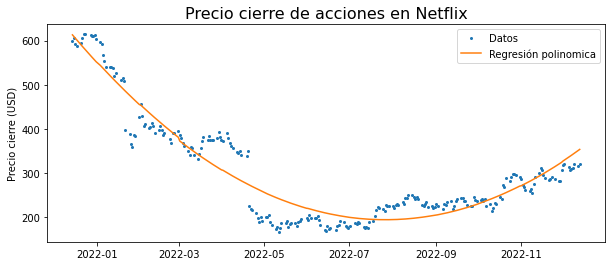

In [ ]:
pd.set_option('mode.chained_assignment', None)
año = np.array([int(i) for i in data['Close'].index.strftime("%Y")])
mes = np.array([int(i) for i in data['Close'].index.strftime("%m")])/12
dia = np.array([int(i) for i in data['Close'].index.strftime("%d")])/365
x = año+mes+dia; y = data['Close']; modelo = np.poly1d(np.polyfit(x, y, 2))

data['Modelo'] = modelo(x)
plt.figure(figsize=(10,4))
plt.plot(y,'o',ms=2, label='Datos')
plt.plot(data['Modelo'], label='Regresión polinomica')
plt.title('Precio cierre de acciones en Netflix', size=16)
plt.ylabel('Precio cierre (USD)'); plt.legend(); plt.show()

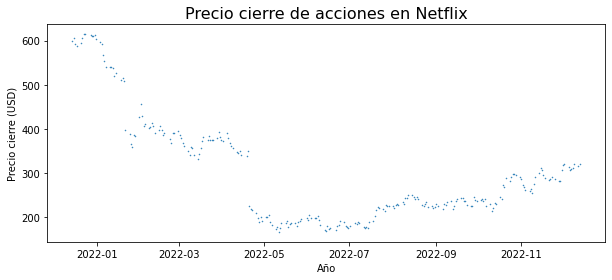

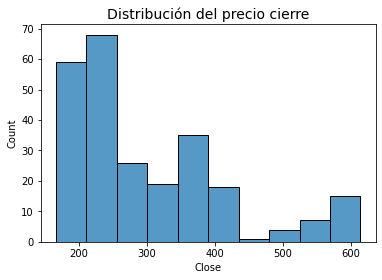

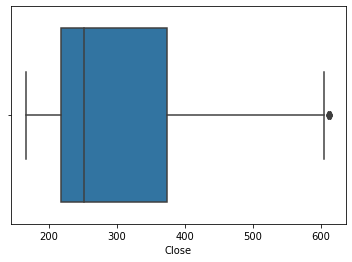

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(data['Close'],'o',ms=0.5)
plt.title('Precio cierre de acciones en Netflix', size=16)
plt.xlabel('Año'); plt.ylabel('Precio cierre (USD)'); plt.show()

sns.histplot(data['Close']); 
plt.title('Distribución del precio cierre',size=14); plt.show()
sns.boxplot(x=data['Close']); plt.show()

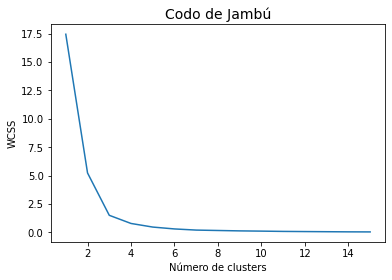

In [ ]:
data = data.copy()
data = pd.DataFrame(data['Close'])
data['N Close'] = (data['Close']-max(data['Close']))/(max(data['Close'])-min(data['Close']))

wcas = []; n=15
for i in range(1, n+1):
  kmeans = KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(np.array(data['N Close']).reshape(-1,1))
  wcas.append(kmeans.inertia_)

plt.plot(range(1,n+1), wcas)
plt.title('Codo de Jambú', size=14)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS'); plt.show()

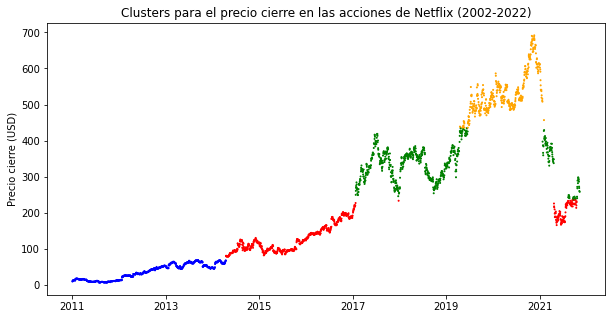

In [ ]:
clustering = KMeans(n_clusters = 4, max_iter=300)
clustering.fit(np.array(data['N Close']).reshape(-1,1))
data['KMeans_Clusters'] = clustering.labels_

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
color_theme = np.array(['blue','green','orange','red'])
ax.scatter(x=data[2421:]['Close'].index, y=data[2421:]['Close'], 
      s=1, c=color_theme[data[2421:].drop(['Close'],axis=1).KMeans_Clusters])
plt.title('Clusters para el precio cierre en las acciones de Netflix (2002-2022)')
plt.ylabel('Precio cierre (USD)'); plt.show()

In [ ]:
'''
pca = PCA(n_components=1)
pca_close = pca.fit_transform(np.array(data['KMeans_Clusters']).reshape(-1,1))
pca_close_df = pd.DataFrame(data=pca_close, columns=['Componente 1'])
pca_nombres_close = pd.concat([pca_close_df, data['KMeans_Clusters']],axis=1)
pca_nombres_close
'''